Вариант про студентов разных факультетов


In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("DATA (1).csv")
df


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


(для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда)

 На осовании столбца GRADE, будем опрелелять успешность/неуспешность(1/0) - если у студента грейд больше или равен 4, он успешен.

In [ ]:
df['GRADE'] = df['GRADE'].apply(lambda x: 1 if x >= 4 else 0)
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,1


на всякий случай проверяем

In [ ]:
df.isna().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

Категориальных нет, давайте посмотрим

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>,
        <Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes: title={'center': '27'}>, <Axes: title={'center': '28'}

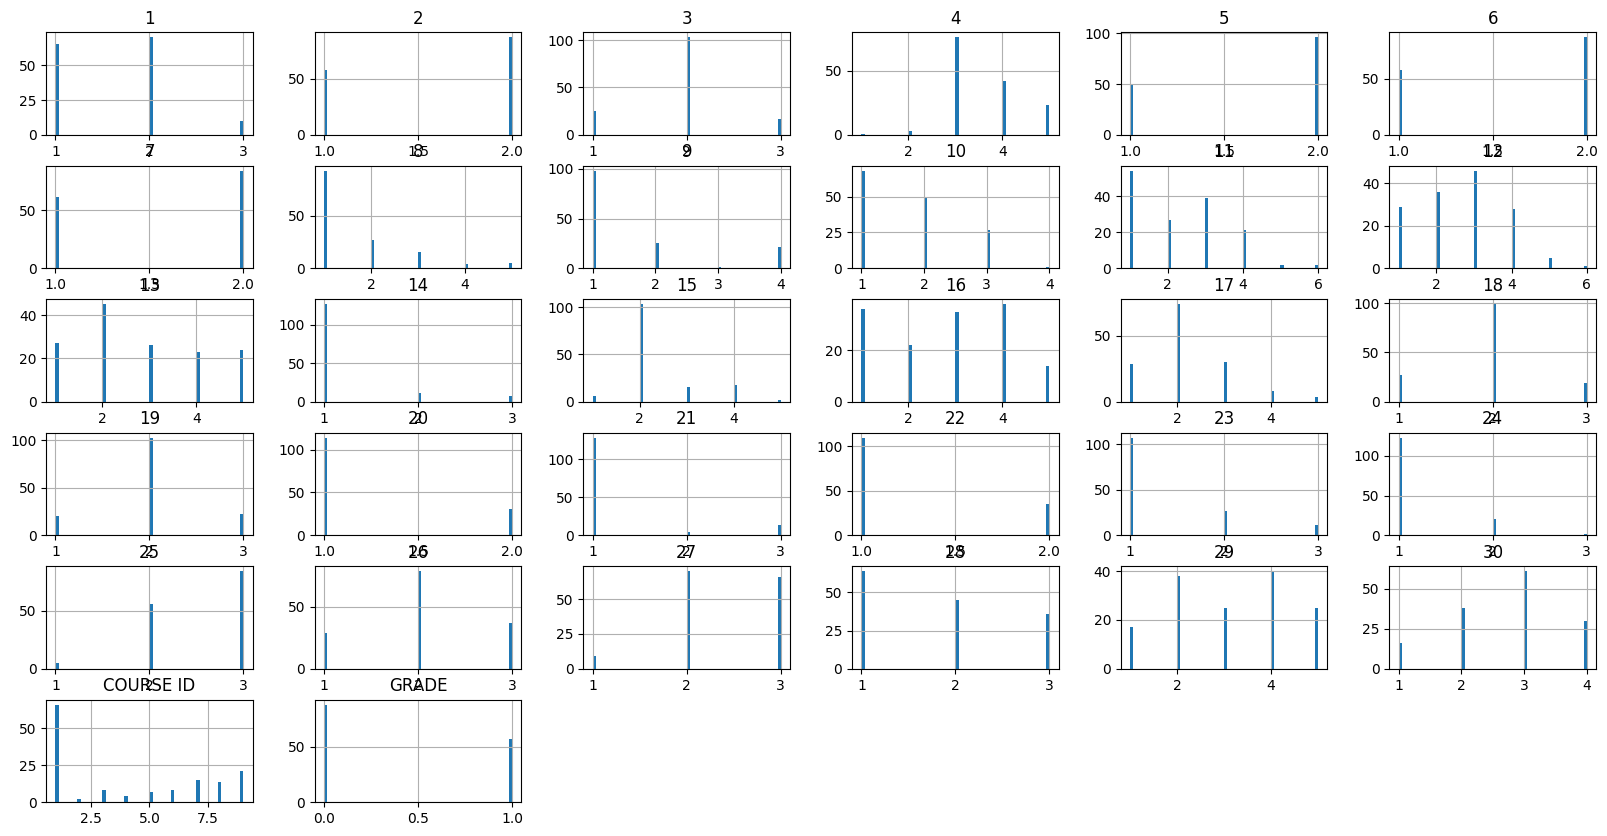

In [ ]:
df.hist(bins=60, figsize=(20, 10))

Сначала реализация всех методов , потом обучение

In [ ]:
cols_count = int(math.sqrt(df.shape[0]))
cols_names = []
for i in range(1, 30):
  cols_names.append(str(i))
cols = list(np.random.choice(cols_names, cols_count, replace=False))
print(cols)

['12', '7', '27', '22', '29', '3', '23', '10', '16', '5', '19', '25']


In [ ]:
df_x = df[cols]
df_y = df[['GRADE']]
learn_count = int(df_x.shape[0] * 0.75)
test_count = df_x.shape[0] - learn_count
df_learn_x = df_x[:learn_count]
df_learn_y = df_y[:learn_count]
df_test_x = df_x[learn_count:]
df_test_y = df_y[learn_count:]


In [ ]:
import math
class Leaf:
  def __init__(self, value: str, prob: float):
        self.value = value
        self.prob = prob
  def __str__(self):
        return f"{self.value} ({self.prob})"

class DecisionTree:
  def __init__(self):
        self.tree = None

  def print_tree(self, tree, indent=""):
    if type(tree) is not dict:
      print(indent, tree)
      return
    for key in tree.keys():
      inner_tree = tree[key]
      for value in inner_tree.keys():
        print(indent, "признак", key, "=", value)
        self.print_tree(inner_tree[value], indent+"  ")


  def fit_test_data(self, df_test, with_prob = False):
    results = []
    rows = list(df_test.index)
    for r in rows:
      if (self.tree == None): return None
      queue = [self.tree]
      cur_tree = self.tree
      while type(cur_tree) is dict:
        col = list(cur_tree.keys())[0]
        for value in cur_tree[col].keys():
          if (value == df_test.loc[r, col]):
            queue.append(cur_tree[col][value])
        queue = queue[1:]
        cur_tree = queue[0]
      if with_prob:
        results.append([cur_tree.value, cur_tree.prob])
      else:
        results.append(cur_tree.value)
    return results

  def get_unique_values(self, df_learn):
    result = {}
    for col in df_learn.columns:
      unique_values = set()
      for i in df_learn[col]:
        unique_values.add(i)
      result[col] = unique_values
    return result

  def get_info_t(self, values_freq, size_df):
    sum_m = 0
    for i in values_freq.keys():
      if values_freq[i] != 0:
        sum_m -= (values_freq[i]/size_df)*math.log((values_freq[i]/size_df), 2)
    return sum_m

  def get_info_t_x(self, x_values_freq, df_learn_y, unique_class_frequencies, size_df):
    sum_m = 0
    for i in x_values_freq.keys():
      sum_m += x_values_freq[i] / size_df * self.get_info_t(unique_class_frequencies[i], x_values_freq[i])
    return sum_m

  def get_max_GR(self, df_learn_x, df_learn_y, columns, rows, unique_values_x, unique_values_y):
    y_values_freq = {i:0 for i in unique_values_y}
    for i in rows:
      y_values_freq[df_learn_y[i]] += 1
    info_t = self.get_info_t(y_values_freq, len(rows))

    max_GR = 0
    max_GR_col = None
    indexes_for_max_GR = {}
    freq_for_max_GR = {}

    for col in columns:
      x_values_freq = {}
      x_values_indexes = {}
      x_y_freq = {}
      for row in rows:
        cur_y = df_learn_y[row]
        cur_x = df_learn_x[col][row]
        if cur_x in x_values_freq.keys():
          x_values_freq[cur_x] += 1
          x_values_indexes[cur_x].append(row)
          x_y_freq[cur_x][cur_y] += 1
        else:
          x_values_freq[cur_x] = 1
          x_values_indexes[cur_x] = [row]
          x_y_freq[cur_x] = {k:0 for k in df_learn_y}
          x_y_freq[cur_x][cur_y] += 1

      info_t_x = self.get_info_t_x(x_values_freq, df_learn_y, x_y_freq, len(rows))
      split_info_x = self.get_info_t(x_values_freq, len(rows))
      cur_GR = -1
      if (split_info_x!=0):
        cur_GR = (info_t - info_t_x)/split_info_x

      if (split_info_x == 0 or cur_GR > max_GR):
        max_GR = cur_GR
        max_GR_col = col
        for uniq in unique_values_x[col]:
          if uniq not in x_values_freq:
            x_values_indexes[uniq] = []
            x_y_freq[uniq] = {k:0 for k in df_learn_y}
        indexes_for_max_GR = x_values_indexes
        freq_for_max_GR = x_y_freq
    return max_GR, max_GR_col, indexes_for_max_GR, freq_for_max_GR

  def get_tree(self, df_learn_x, df_learn_y, target):
    unique_values_x = self.get_unique_values(df_learn_x)
    unique_values_y = list(self.get_unique_values(df_learn_y)[target])
    tree = self.make_tree(df_learn_x, df_learn_y[target], df_learn_x.columns, df_learn_x.index, unique_values_x, unique_values_y)
    self.tree = tree
    return self.tree

  def make_tree(self, df_learn_x, df_learn_y, columns, rows, unique_values_x, unique_values_y):
    if len(rows) == 0:
      return None
    tree = {}

    max_GR, max_GR_col, indexes_for_max_GR, freq_for_max_GR = self.get_max_GR(df_learn_x, df_learn_y, columns, rows, unique_values_x, unique_values_y)

    tree = {max_GR_col : {}}

    new_columns = [col for col in columns if col!=max_GR_col]

    for i in indexes_for_max_GR.keys():
      y_values = [k for k in freq_for_max_GR[i].keys() if freq_for_max_GR[i][k]!=0]
      if (len(y_values) == 1):
        tree[max_GR_col][i] = Leaf(y_values[0], 1)
      else:
        subtree = self.make_tree(df_learn_x, df_learn_y, new_columns, indexes_for_max_GR[i], unique_values_x, unique_values_y)
        if (subtree == None):
          max_freq_y = None
          max_freq = 0
          y_values_freq = {j:0 for j in unique_values_y}
          for j in rows:
            y_values_freq[df_learn_y[j]] += 1
          for j in y_values_freq:
            if y_values_freq[j] > max_freq:
              max_freq = y_values_freq[j]
              max_freq_y = j
          subtree = Leaf(max_freq_y, max_freq/len(rows))
        tree[max_GR_col][i] = subtree

    return tree

In [ ]:
def confusion_matrix(Y_true, Y_pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    for true_label, pred_label in zip(Y_true, Y_pred):
        if true_label == 1:
            if pred_label == 1:
                TP += 1
            else:
                FN += 1
        else:
            if pred_label == 1:
                FP += 1
            else:
                TN += 1
    return [[TP, FP], [FN, TN]]

Ну что начнем


In [ ]:
model = DecisionTree()
tree = model.get_tree(df_learn_x, df_learn_y, 'GRADE')


Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall

In [ ]:
confusion_matrix = confusion_matrix(list(df_test_y['GRADE']), model.fit_test_data(df_test_x))

accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1])
print("Accuracy:", accuracy)
precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
print("Precision:", precision)
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
print("Recall:", recall)



Accuracy: 0.5675675675675675
Precision: 0.1875
Recall: 0.5



Построить AUC-ROC и AUC-PR и тоже без библиотек

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.3225806451612903, 0.41935483870967744, 0.41935483870967744, 0.41935483870967744, 0.41935483870967744, 0.419354838709

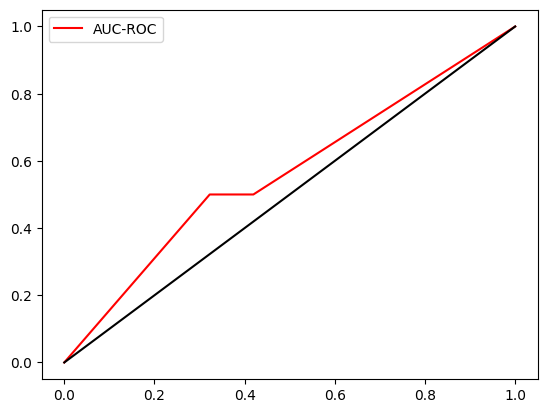

In [ ]:
TPR = []
FPR = []
result = model.fit_test_data(df_test_x, True)
for th in np.arange(1, 0, -0.01):
  TP, TN, FP, FN = 0, 0, 0, 0
  for i in range(len(list(df_test_y['GRADE']))):
    if list(df_test_y['GRADE'])[i] == 1:
      if result[i][0] == 1 and result[i][1] >= th:
        TP += 1
      else:
        FN += 1
    else:
      if result[i][0] == 1 and result[i][1] >= th:
        FP += 1
      else:
        TN += 1
  conf = [[TP, FP], [FN, TN]]
  TPR.append(conf[0][0]/(conf[0][0] + conf[1][0]))
  FPR.append(conf[0][1] / (conf[0][1] + conf[1][1]))
print(TPR)
print(FPR)

plt.plot([0] + FPR + [1], [0] + TPR + [1], color = "red", label="AUC-ROC")
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color = "black")
plt.legend()
plt.show()





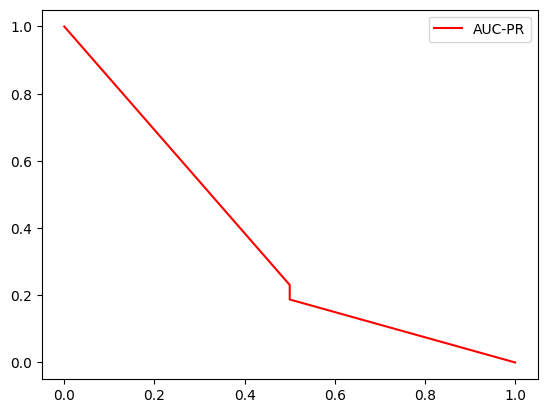

In [ ]:
PR = []
RC = []
result = model.fit_test_data(df_test_x, True)
for th in np.arange(0, 1, 0.01):
  TP, TN, FP, FN = 0, 0, 0, 0
  for i in range(len(test_y)):
    if test_y[i] == 1:
      if result[i][0] == 1 and result[i][1] >= th:
        TP += 1
      else:
        FN += 1
    else:
      if result[i][0] == 1 and result[i][1] >= th:
        FP += 1
      else:
        TN += 1
  conf = [[TP, FP], [FN, TN]]
  RC.append(conf[0][0]/(conf[0][0] + conf[1][0]))
  PR.append(conf[0][0]/(conf[0][0] + conf[0][1]))
plt.plot([1] + RC + [0], [0] + PR + [1], color = "red", label="AUC-PR")
plt.legend()
plt.show()